In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
data_path = "data/sentiment_analysis_data_km.xlsx"
data = pd.read_excel(data_path)

In [3]:
# Check basic dataset info
print("Dataset Info:\n")
data.info()

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10729 entries, 0 to 10728
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   source     10729 non-null  object
 1   texts      10729 non-null  object
 2   texts_km   10729 non-null  object
 3   text_prep  10729 non-null  object
 4   sentiment  10729 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 419.2+ KB


In [4]:
# Display first few rows of the dataset
print("\nFirst Few Rows:\n")
print(data.head())


First Few Rows:

  source                                              texts  \
0   Yelp                           Wow... Loved this place.   
1   Yelp                                 Crust is not good.   
2   Yelp          Not tasty and the texture was just nasty.   
3   Yelp  Stopped by during the late May bank holiday of...   
4   Yelp  The selection on the menu was great and so wer...   

                                            texts_km  \
0                        អីយ៉ា ... ស្រឡាញ់កន្លែងនេះ។   
1                                 សំបកគឺជាការមិនល្អ។   
2           មិនហ៊ាននិងវាយនភាពនេះគឺអាក្រក់គ្រាន់តែជា។   
3  បញ្ឈប់ដោយក្នុងអំឡុងពេលថ្ងៃឈប់សម្រាកចុងខែឧសភាបិ...   
4  ការជ្រើសនៅលើម៉ឺនុយនេះគឺអស្ចារ្យណាស់ហើយត្រូវបាន...   

                                           text_prep  sentiment  
0                         អីយ៉ា ស្រឡាញ់ កន្លែង នេះ ។          1  
1                           សំបក គឺ ជា ការ មិន ល្អ ។          0  
2  មិន ហ៊ាន និង វាយន ភាព នេះ គឺ អាក្រក់ គ្រាន់ តែ...          0  
3 

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n")
print(missing_values)


Missing Values:

source       0
texts        0
texts_km     0
text_prep    0
sentiment    0
dtype: int64


In [6]:
# Unique sentiment labels
unique_sentiments = data['sentiment'].value_counts()
print("\nSentiment Distribution:\n")
print(unique_sentiments)


Sentiment Distribution:

sentiment
1    5375
0    5354
Name: count, dtype: int64


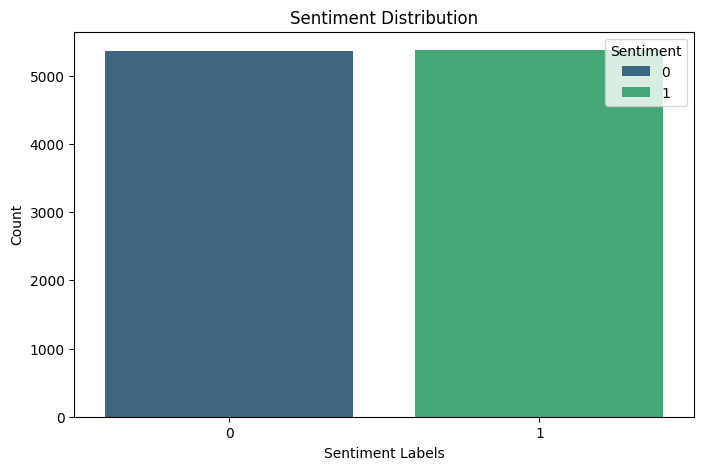

In [7]:
# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=data, palette='viridis', hue='sentiment', dodge=False)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.legend(title="Sentiment", loc="upper right")
plt.show()

In [8]:
#Token Length Analysis
# Add a column for token length
data['token_length'] = data['text_prep'].apply(lambda x: len(str(x).split()))

# Token Length Statistics
token_stats = data['token_length'].describe()
print("\nToken Length Statistics:\n")
print(token_stats)


Token Length Statistics:

count    10729.000000
mean        67.482338
std         50.164302
min          1.000000
25%         26.000000
50%         62.000000
75%        108.000000
max       1940.000000
Name: token_length, dtype: float64


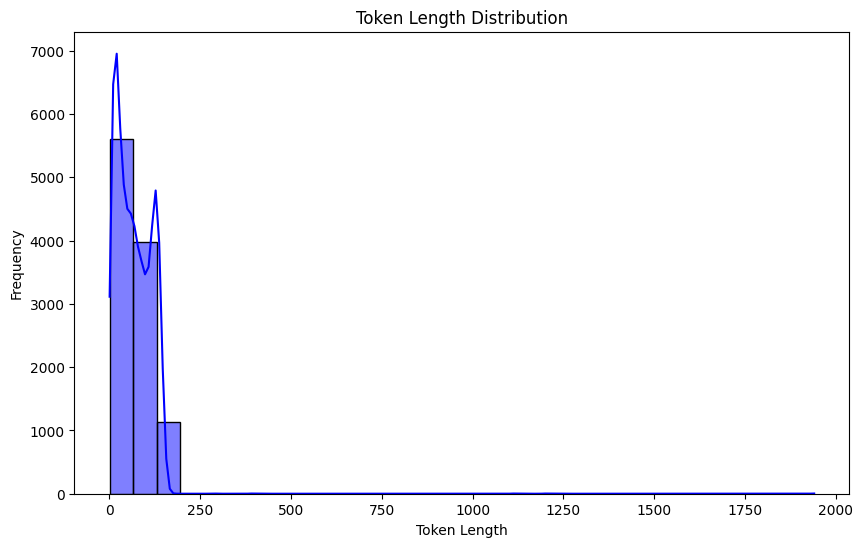

In [9]:
# Plot token length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['token_length'], bins=30, kde=True, color='blue')
plt.title('Token Length Distribution')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Source Distribution
source_counts = data['source'].value_counts()
print("\nSource Distribution:\n")
print(source_counts)


Source Distribution:

source
Ecommerce    8000
Yelp          995
Amazon        990
IMDb          744
Name: count, dtype: int64


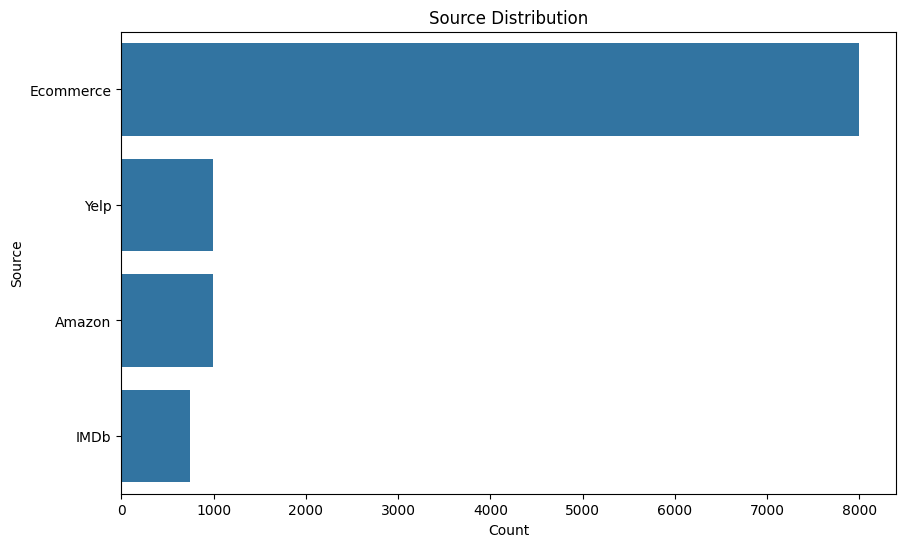

In [11]:

# Plot source distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='source', data=data, order=source_counts.index)
plt.title('Source Distribution')
plt.xlabel('Count')
plt.ylabel('Source')
plt.show()

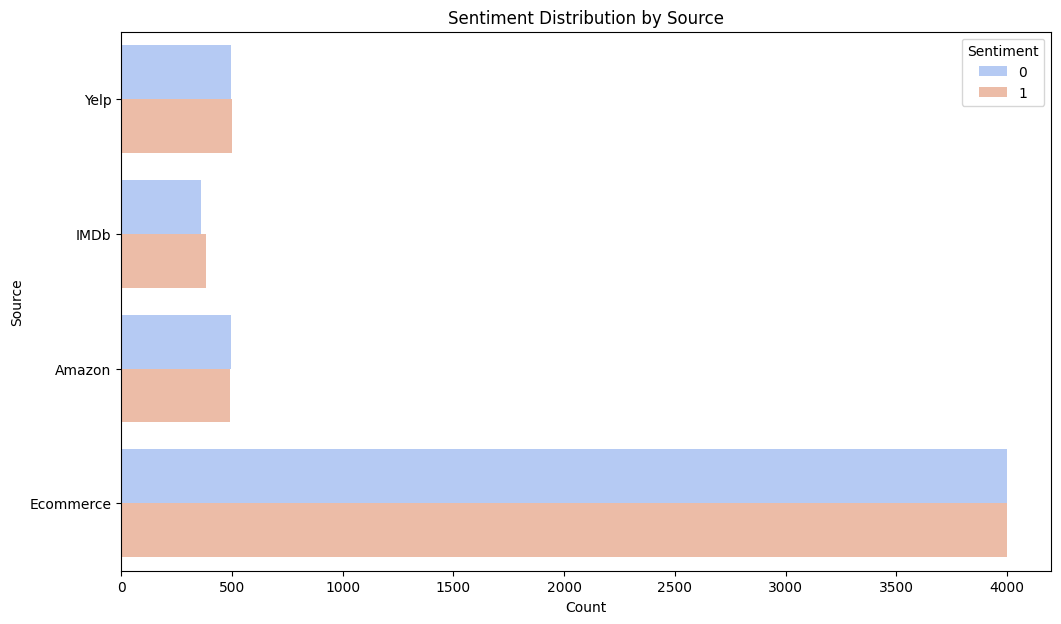

In [12]:
# Sentiment per Source
plt.figure(figsize=(12, 7))
sns.countplot(data=data, y="source", hue="sentiment", palette="coolwarm")
plt.title("Sentiment Distribution by Source")
plt.xlabel("Count")
plt.ylabel("Source")
plt.legend(title="Sentiment", loc="upper right")
plt.show()

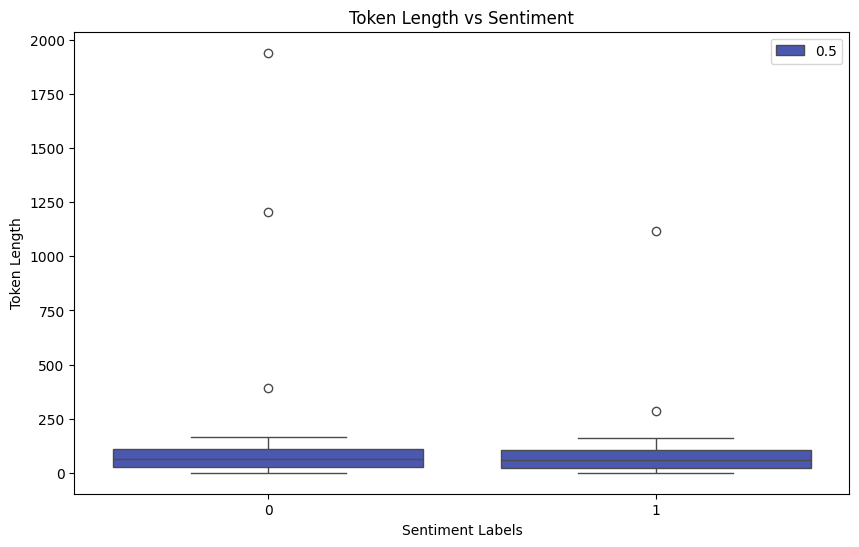

In [13]:

# Correlation between token length and sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='token_length', data=data, palette='coolwarm', hue=0.5)
plt.title('Token Length vs Sentiment')
plt.xlabel('Sentiment Labels')
plt.ylabel('Token Length')
plt.show()

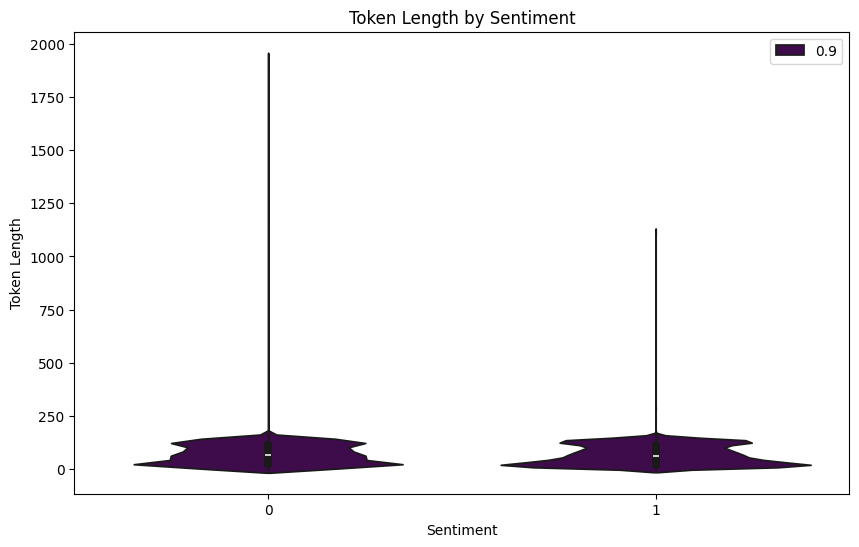

In [14]:
# Violin plot of token length by sentiment
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentiment', y='token_length', data=data, palette='viridis', hue=0.9)
plt.title('Token Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Token Length')
plt.show()

In [15]:
from wordcloud import WordCloud
from matplotlib import font_manager
import matplotlib.pyplot as plt
from khmernltk import word_tokenize

# Set the font properties
khmer_font_path = "/Users/tykea/Library/Fonts/KhmerOSSiemreap.ttf"  
font_manager.fontManager.addfont(khmer_font_path)
plt.rcParams['font.family'] = 'Khmer OS Siemreap'  

| 2024-12-14 18:07:37,309 | INFO | khmer-nltk | Loaded model from /Users/tykea/miniconda3/envs/cadtml/lib/python3.10/site-packages/khmernltk/word_tokenize/sklearn_crf_ner_10000.sav |


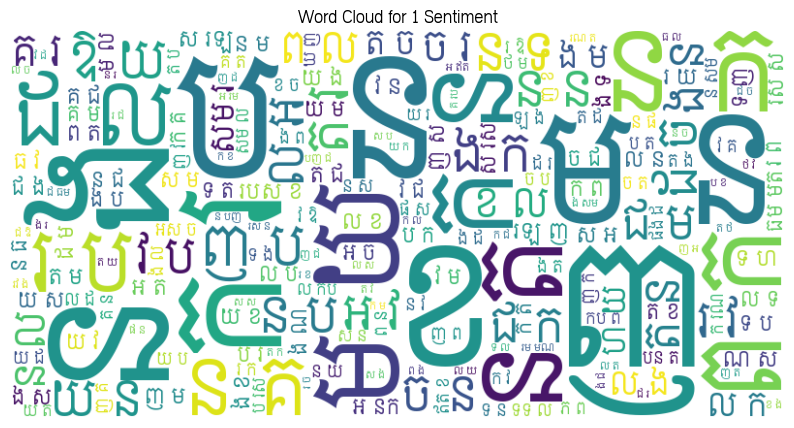

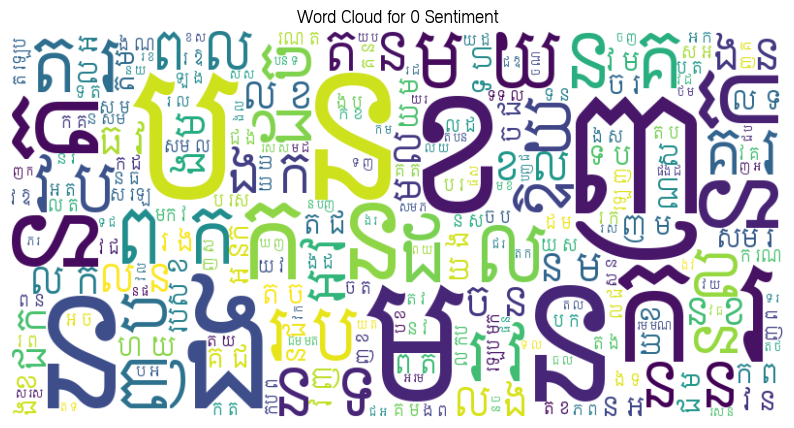

In [16]:
#Generate word clouds for each sentiment
sentiments = data['sentiment'].unique()
for sentiment in sentiments:
    text = ' '.join(data[data['sentiment'] == sentiment]['text_prep'])
    tokenized_text = ' '.join(word_tokenize(text)) 
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=khmer_font_path).generate(tokenized_text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

### WordCoud does not work well with Khmer.

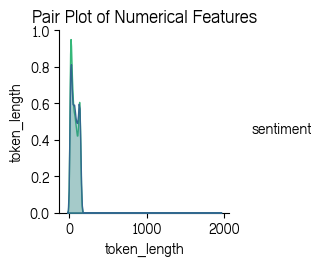

In [17]:
# Pair plot of numerical features
sns.pairplot(data[['token_length', 'sentiment']], hue='sentiment', palette='viridis')
plt.title('Pair Plot of Numerical Features')
plt.show()